In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# NLP Concepts 2

## Dot product

In [2]:
u = np.array([1, 2, 3])
v = np.array([4, 5, 6])

In [7]:
1*4 + 2*5 + 3*6

32

In [8]:
u.T @ v

32

## Sigmoid function

$$ \Large \sigma(x) = \frac{1}{1 + e^{-x}}$$

<br><br><br>

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [26]:
x = np.array([1, 2, 3, 4, 5, 6])
sigmoid(x)

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715,
       0.99752738])

## Softmax function

$$ \Large softmax(x) = \frac{exp(x)}{\Sigma_{i=0}^X exp(x_i)}$$

In [27]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

<BarContainer object of 6 artists>

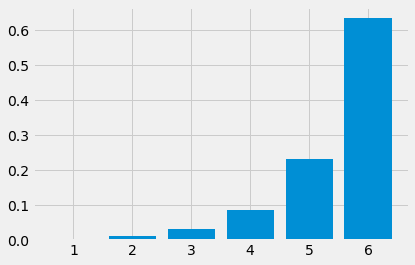

In [28]:
plt.bar(x, softmax(x))

## Word2Vec - Training

### Probabiity computation

$$ \Large P(w_o|w_c) = \frac{exp(u_o^T v_c)}{\sum_{w=1}^{V}exp(u_w^T v_c)}$$

where
* $w_o$ is an outside word
* $w_c$ is the center word
* $u_o$ is a context representation of a given word
* $u_w$ is a context representation of a given word
* $v_c$ is a central representation of a given word
* $V$ is vocab size


### Training

#### Negative likelihood function

$$ \Large L(\theta) = - \frac{1}{T}\prod_{t=1}^T \prod_{-m\leq j \geq m; j \neq 0} P(w_{t+j}|w_t; \theta)$$

where 
* $T$ is a number of positions in the entire corpus
* $m$ is the window half-size


#### Negative log-likelihood

$$ \Large log L(\theta) = - \frac{1}{T}\sum_{t=1}^T \sum_{-m\leq j \geq m; j \neq 0} log P(w_{t+j}|w_t; \theta)$$

where 
* $T$ is a number of positions in the entire corpus
* $m$ is the window half-size



#### Let's minimize

To train your model you need to compute all vector gradients!

Let's use our probability computation in the log-likelihood function.

$$ \Large log L(\theta) = - \frac{1}{T}\sum_{t=1}^T \sum_{-m\leq j \geq m; j \neq 0} log(\frac{exp(u_o^T v_c)}{\sum_{w=1}^{V}exp(u_w^T v_c)})$$


<br><br><br><br><br>

In order to minimize $log L(\theta)$ we need gradients.

$$ \Large \frac{\partial}{\partial v_c} log(\frac{exp(u_o^T v_c)}{\sum_{w=1}^{V}exp(u_w^T v_c)})$$



<br><br><br><br><br>

Log of a division can be seen as a subtraction of logs:

$$ \Large \frac{\partial}{\partial v_c} log(exp(u_o^T v_c)) - log(\sum_{w=1}^{V}exp(u_w^T v_c))$$

<br><br><br><br><br>

How can we simplify this? ❓❓❓


<br><br><br><br><br><br><br><br><br><br>

$$ \Large \frac{\partial}{\partial v_c} u_o^T v_c - log\sum_{w=1}^{V}exp(u_w^T v_c)$$

<br><br><br><br><br>

Why does it work?



In [30]:
x = 32

np.log(np.exp(x)) 

32.0


<br><br><br><br><br>

Let's simplify further. What's the partial derivative of $\frac{\partial}{\partial v_c} u_o^T v_c $? ❓❓❓


<br><br><br><br><br><br><br><br><br><br>

$$ \Large \frac{\partial}{\partial v_c} u_o^T v_c = u_o $$

<br><br><br><br><br>

Now, let's focus on the second part:


$$ \Large \frac{\partial}{\partial v_c} - log\sum_{w=1}^{V}exp(u_w^T v_c)$$


<br><br><br><br><br>

Let's **ignore the minus sign** for a while apply the **chain rule** 🚀 to the folowing expression:

$$ \Large \frac{\partial}{\partial v_c} log\sum_{w=1}^{V}exp(u_w^T v_c)$$

<br><br><br><br><br>

This gives us:

$$ \Large \frac{1}{\sum_{w=1}^{V}exp(u_w^T v_c)} \cdot \frac{\partial}{\partial v_c}\sum_{x=1}^{V}exp(u_x^T v_c)$$

<br><br><br><br><br>

Distribute:

$$ \Large \frac{1}{\sum_{w=1}^{V}exp(u_w^T v_c)} \cdot \sum_{x=1}^{V}\frac{\partial}{\partial v_c}exp(u_x^T v_c)$$

<br><br><br><br><br>

And now... 

<br><br><br><br><br>

The **chain rule** again! 🚀

<br><br><br>

$$ \Large \frac{1}{\sum_{w=1}^{V}exp(u_w^T v_c)} \cdot \sum_{x=1}^{V}exp(u_x^T v_c)u_x$$

<br><br><br><br><br>
🌺 Let's prettify this a bit:

$$ \Large \sum_{x=1}^{V}\frac{exp(u_x^T v_c)}{\sum_{w=1}^{V}exp(u_w^T v_c)}u_x$$


<br><br><br><br><br>

🧠 Remember our formula for computing probability of outside word $P(w_o|w_c)$? 

<br><br><br><br><br>

$$ \Large P(w_o|w_c) = \frac{exp(u_o^T v_c)}{\sum_{w=1}^{V}exp(u_w^T v_c)}$$

Similar, ha?

<br><br><br><br><br>

💪🏼 Let's bring everythig together!

<br><br>


$$ \Large \frac{\partial logprob}{\partial v_c} = u_o - \sum_{x=1}^{V}P(w_x|w_c)u_x$$

<br><br><br><br><br>

💎 Ok, we've got it for $v_c$! Now we need to appply similar computation for other parameters of the model ($u_o$). 

💎 We won't do it now, but feel free to do it at home!

<br><br><br><br><br>

## Additional tricks

### Sub-sampling

Sub-sampling reduces probability of using the most frequent (or the least frequent) words in the training.

Note that the formula comes from Google implementation of W2V and it's slightly different from the one in he paper.


$$ \Large P(w_j) = (\sqrt{\frac{z(w_j)}{k}} + 1) \frac{k}{z(w_j)} $$


** Default value for $k = .001$


In [32]:
def subsampling(freqs, k):
    freqs = np.array(freqs)
    return (np.sqrt(freqs / k) + 1) * k / freqs

In [33]:
k = .001
freqs = np.arange(.01, 1.1, .01)

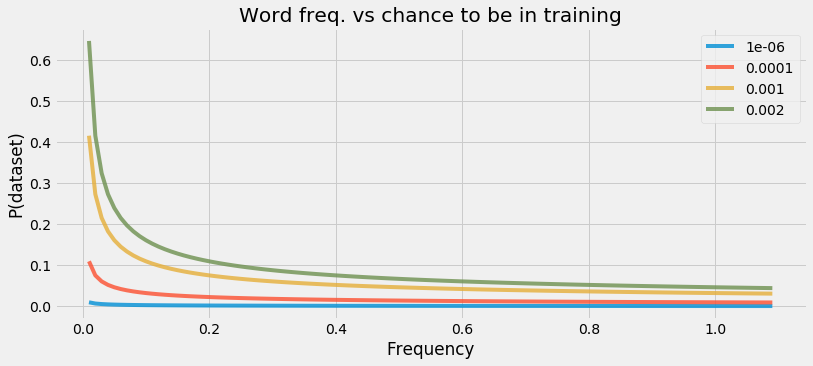

In [34]:
plt.figure(figsize = (12, 5))

for k in [0.000001, 0.0001, .001, .002]:
    plt.plot(freqs, subsampling(freqs, k), label = k, alpha = .8)#, s = 3)
plt.xlabel('Frequency')
plt.ylabel('P(dataset)')
plt.legend()
plt.title('Word freq. vs chance to be in training')
plt.show()

### Negative sampling

Instead of all negative examples (all words not present in the context), we will just update weights for a couple of randomly selected words. 


$$ \Large P(w_i) = \frac{f(w_i)^k}{\sum_{j=0}^N(f(w_j)^k)}$$

In [35]:
def negative_sampling(freqs, k):
    freqs = np.array(freqs)
    return freqs**k / np.sum(freqs**k)

In [36]:
freqs = [20, 10, 100, 14]
k = .75

In [37]:
negative_sampling(freqs, k)

array([0.17532815, 0.10425074, 0.586245  , 0.13417611])

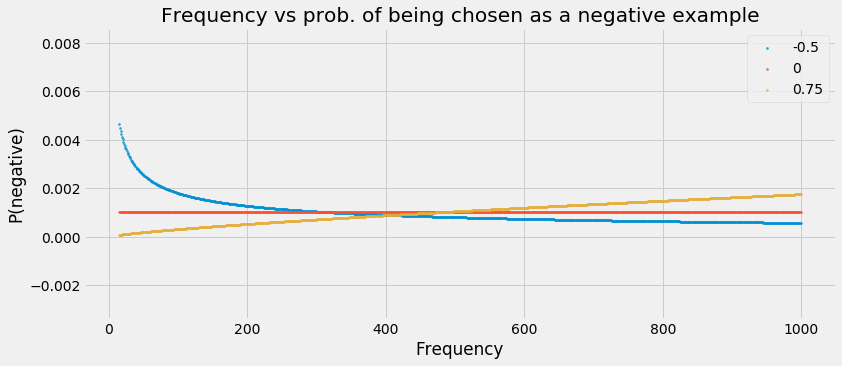

In [38]:
freqs = np.arange(15, 1000)

plt.figure(figsize = (12, 5))

for k in [-.5, 0, .75]:
    plt.scatter(freqs, negative_sampling(freqs, k), label = k, alpha = .8, s = 4)
    plt.legend()

plt.title('Frequency vs prob. of being chosen as a negative example')
plt.xlabel('Frequency')
plt.ylabel('P(negative)')
plt.show()